In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log
import autograd

from IPython.display import display
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [164]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [165]:
alpha = 2/3
beta = 4/3
gamma = 1.0
delta = 2.0

0.6666666666666666

$$ \left\{
    \begin{array}{ll}
        \frac{dx_1}{dt} = x_1.(\alpha − \beta.x_2) \\
        \frac{dx_2}{dt} = -x_2.(\gamma - \delta.x_1) 
    \end{array}
    \right. $$
    
$$ dx_1 = x_1(t+dt) - x_1(t) $$
$$ dx_2 = x_2(t+dt) - x_2(t) $$

In [166]:
xmax = 1
ymax = 1
dx = 0.1
dy = 0.1
Nx = int(xmax/dx)+1
Ny = int(ymax/dy)+1

dt = dx

#### Question 1

Interprétation des termes des équations :
- $\alpha$ : coefficient de reproduction des proies
- $\beta$ : taux de mortalité des proies, à cause des prédateurs
- $\gamma$ : mortalité des prédateurs en l'absence de proies
- $\delta$ : coefficient de reproduction des prédateurs grâce à la présence de proies

Les points d'équilibre vérifient :
$$ \left\{
    \begin{array}{ll}
        x_1.(\alpha − \beta.x_2) = 0 \\
        -x_2.(\gamma - \delta.x_1) = 0 
    \end{array}
    \right. $$



Les points d'équilibre sont donc :
- $(0,0)$ qui est instable. En effet, on étudie la fonction $f : (x_1,x_2) \mapsto (x_1.(\alpha - \beta .x_2), -x_2.(\gamma - \delta . x_1))$ qui est continûment différentiable (par théorèmes généraux). Sa matrice jacobienne en $(0,0)$ est 

$$J_f(0,0) = 
 \begin{pmatrix}
     \alpha & 0 \newline
     0 & -\delta
  \end{pmatrix} 
$$ 

dont les valeurs propres sont $\alpha > 0$ et $-\delta < 0$. $(0,0)$ est donc instable par théorème de lien entre stabilité et stabilité du linéarisé tangent.
- $\overline{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ dont on ne peut pour l'instant rien dire avec le théorème ci-dessus. En effet, avec la même fonction $f$ : 

$$J_f(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) = 
 \begin{pmatrix}
     0 & -\frac{\beta\gamma}{\delta} \newline
     \frac{\alpha\delta}{\beta} & 0
  \end{pmatrix} 
$$

dont les valeurs propres sont des imaginaires purs : $+i\sqrt{\alpha\gamma}$ et $-i\sqrt{\alpha\gamma}$.

#### Question 2

In [170]:
X = np.linspace(0, xmax, Nx)
Y = np.linspace(0, ymax, Ny)
X, Y = np.meshgrid(X, Y)
U = (alpha-beta*Y)*X
V = (delta*X-gamma)*Y

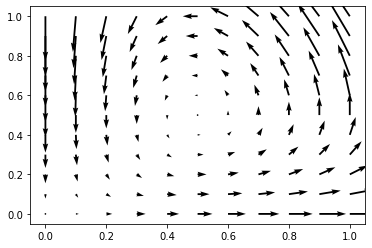

In [171]:
# champ de vecteur
plt.quiver(X,Y,U,V);

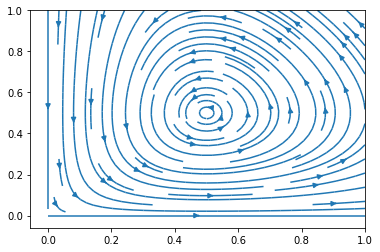

In [172]:
# portrait de phase
plt.streamplot(X,Y,U,V);

#### Question 3

Soit $(x_1,x_2)$ une solution des équations de Lotka-Vloterra, initialisée à $t_0$ dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$. On montre que sur son ensemble de définition, cette solution reste dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$.

Par l'absurde, supposons qu'il existe un temps $t' > t_0$ tq $x_1(t') \leq 0$ ou $x_2(t') \leq 0$. Par continuité de la solution, et puisque $x_1(t_0) > 0$ et $x_2(t_0) > 0$, il existe $t_1$ tq $x_1(t_1) = 0$ ou $x_2(t_1) = 0$.
- si $(x_1(t_1), x_2(t_1)) = (0,y)$, on vérifie que $(t \mapsto 0, t \mapsto y.e^{\gamma(t_1 - t)})$ est solution. De plus, $f : (a,b) \mapsto (a.(\alpha - \beta .b), -b.(\gamma - \delta . a))$ est différentiable et  

$$J_f(a,b) = 
 \begin{pmatrix}
     \alpha - \beta b & -\beta a \newline
     \delta b & \delta a - \gamma
  \end{pmatrix} 
$$

ce qui assure sa continue différentiabilité par rapport à (a,b). Cette solution est unique par théorème de Cauchy-Lipschitz. On a alors $x_1(t_0) = 0$, ce qui contredit les hypothèses.
- de la même manière, si $(x_1(t_1), x_2(t_1)) = (y,0)$, l'unique solution est $(t \mapsto y.e^{\gamma(t_1 - t)}, t \mapsto 0)$, ce qui mène à une contradiction.

On a bien montré le résultat.

#### Question 4

On étudie la fonction $H : (x_1,x_2) \mapsto \delta x_1 - \gamma \ln(x_1) + \beta x_2 - \alpha \ln(x_2)$ le long des solutions
initialisées dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$ :

$$\frac{dH}{dt} = \delta \frac{dx_1}{dt} - \frac{\gamma}{x_1} \frac{dx_1}{dt} + \beta \frac{dx_2}{dt} - \frac{\alpha}{x_2} \frac{dx_2}{dt} = 0$$

$H$ est constante, donc la solution $(x_1, x_2)$ est bornée, et est donc définie sur $\mathbb{R}$.

#### Question 5

In [119]:
def H(x1, x2):
    return delta*x1 - gamma*log(x1) + beta*x2 - alpha*log(x2)

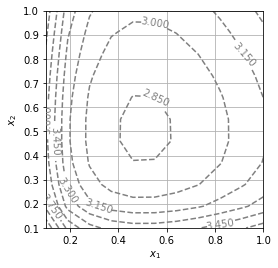

In [129]:
display_contour(
    H, 
    x=np.linspace(0.1, xmax, Nx), 
    y=np.linspace(0.1, ymax, Ny), 
    levels=10
)

$\overline{x}$ est au centre des lignes de niveaux ; c'est un minimum de $H$. Les solutions tournent autour de $\overline{x}$, sur les courbes de niveaux de $H$.  $\overline{x}$ est un point d'équilibre stable, puisque toute solution initialisée proche de $\overline{x}$ suit une courbe de niveau de $H$, et on observe graphiquement que les courbes de niveaux encerclent $\overline{x}$ sans s'en éloigner (à plus d'un certain epsilon).

#### Question 6

In [15]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    N = int((tf-t0)/dt) + 1
    t = np.linspace(t0,tf,N)
    x = [x0]
    for i in range(N-1):
        x.append(x[i] + dt*f(t[i],x[i]))
    return t, np.array(x)

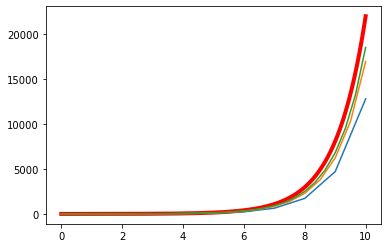

In [58]:
def test(x,t):
    return np.exp(x)
tr = np.linspace(0,10,500)
xr = np.exp(tr)
plt.plot(tr,xr, color='red',linewidth=4)

for i in range(1,4):
    t, x = solve_euler_explicit(test,0,1/i,0,10)
    plt.plot(t,x)



On voit çi dessus la convergence du schéma Euler explicite lorsque dt tend vers 0 (les courbes se raprochent de la courbe épaisse rouge qui est la solution analytique).

pour visualiser graphiquement l'odre de convergence on peut prendre le logarithme de la différence entre la solution numérique et analytique ainsi :

$$ log(\| x_{j}-x(t_j) \| ) \leq log(cste) + ordre * log(dt)$$


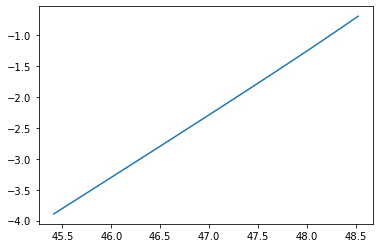

In [89]:
DT = []
DIFF = []
for i in range(2,50):
    t, x = solve_euler_explicit(test,0,1/i,0,50)
    xr = np.exp(t)
    diff = np.abs(xr-x)
    DIFF.append(log(max(diff)))
    DT.append(log(1/i))
    DF.append(2*log(1/i))

plt.plot(DIFF,DT)
   

le coefficient directeur entier de la droite qui le majore le mieux 

#### Question 7

In [98]:
def LotkaVolterra(t,x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha-beta*x2) , -x2*(gamma-delta*x1)])

In [130]:
t,x = solve_euler_explicit(LotkaVolterra,np.array([1,1]),0.01,0,500)

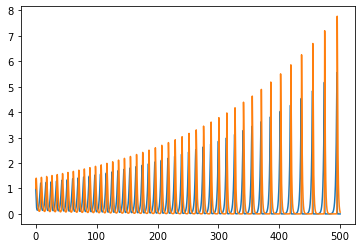

In [131]:
plt.plot(t,x);

En temps long, on observe que la solution obtenue avec la méthode d'Euler explicite diverge. Cette résolution ne correspond pas à la réalité, puisqu'on a montré en question 4 que les solutions n'explosaient pas en temps fini.

In [148]:
N = x.shape[0]
proies = np.array([x[i][0] for i in range(N)])
pred = np.array([x[i][1] for i in range(N)])

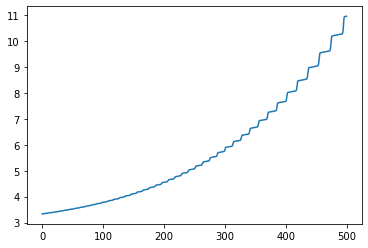

In [147]:
h = H(proies, pred)
plt.plot(t,h);

La fonction $H$ le long de la solution obtenue grâce à Euler explicite n'est pas constante dans le temps, alors qu'elle l'est le long d'une solution exacte. La méthode d'Euler explicite diverge en temps fini.

#### Question 8

In [178]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [179]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [180]:
def Newton(f, x0, dt, t1, itermax, eps=10^(-5)):
    
    def solve_x_suiv(y):
        return y - x0 + dt*f(t1,y)
    
    for i in range(itermax):
        v = x0 - np.dot(np.linalg.inv(J(solve_x_suiv)(x0[0], x0[1])),solve_x_suiv(x0[0], x0[1]))
        x = v[0]
        y = v[1]
        if np.sqrt( (x - x0[0])**2 + (y - x0[1])**2 ) <= eps:
            return x, y
        x0 = np.array([x, y])
    else:
        raise ValueError(f"no convergence in {N} steps.")

In [181]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    N = int((tf-t0)/dt) + 1
    t = np.linspace(t0,tf,N)
    x = [x0]
    
    for i in range(N-1):
        x_suivant = Newton(f, x[i], dt, t[i+1], itermax)
        x.append(x[i] + dt*x_suivant)
    return t, x

In [182]:
t,x = solve_euler_implicit(LotkaVolterra,np.array([1,1]),0.01,0,500)

TypeError: Can't differentiate w.r.t. type <class 'numpy.int32'>

#### Question 9

On étudie les équations suivantes :

$$ \left\{
    \begin{array}{ll}
        \frac{dx_1}{dt} = x_1.(\alpha − \beta.x_2) - u_1(x_1,x_2).(H(x_1,x_2) - H_0) \\
        \frac{dx_2}{dt} = -x_2.(\gamma - \delta.x_1) - u_2(x_1,x_2).(H(x_1,x_2) - H_0)
    \end{array}
    \right. $$
    
où $H_0 = H(x_1(0),x_2(0))$ et $u : \mathbb{R}^2 \mapsto \mathbb{R}^2$ est continûment différentiable.

Si $(x_1, x_2)$ est solution des équations de Lotka-Volterra, alors $H$ est constante le long de $(x_1(t), x_2(t))$, et donc $\forall t, H(x_1(t),x_2(t)) - H_0 = 0$. $(x_1,x_2)$ est alors aussi solution des équations ci-dessus.

#### Question 10

Pour $(x_1,x_2)$ solution du système, $u$ continûment différentiable : 

$\frac{d}{dt}(H(x(t)) - H_0) = \delta \frac{dx_1}{dt} - \frac{\gamma}{x_1} \frac{dx_1}{dt} + \beta \frac{dx_2}{dt} - \frac{\alpha}{x_2} \frac{dx_2}{dt}$
$$= -(H(x_1,x_2) - H_0).((\delta - \frac{\gamma}{x_1}).u_1(x_1,x_2) + (\beta - \frac{\alpha}{x_2}).u_2(x_1,x_2))$$

Or on a $\nabla H(x(t)) = (\delta - \frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})$.

En choisissant $u:(x_1,x_2) \mapsto k.(\delta - \frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})$, on a alors : 

$$\frac{d}{dt}(H(x(t)) - H_0) = -k\|\nabla H(x(t))\|^2.(H(x(t))-H_0)$$

Supposons que $x$ reste à une distance strictement positive de $\overline{x}$. Ainsi, $\exists c > 0$ tq $\forall t$, $\|x(t) - \overline{x}\| \geq c$. 